In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
def reduce_mem_usage(df):
    """ 
    iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
Train_data = reduce_mem_usage(pd.read_csv('input/used_car_train_20200313.csv',
                                          sep=' '))
TestA_data = reduce_mem_usage(pd.read_csv('input/used_car_testB_20200421.csv',
                                          sep=' '))

print('Train data shape: {}'.format(Train_data.shape))
print('TestA_data shape: {}'.format(TestA_data.shape))

Memory usage of dataframe is 37200128.00 MB
Memory usage after optimization is: 10200232.00 MB
Decreased by 72.6%
Memory usage of dataframe is 12000128.00 MB
Memory usage after optimization is: 3200232.00 MB
Decreased by 73.3%
Train data shape: (150000, 31)
TestA_data shape: (50000, 30)


In [4]:
Train_data['notRepairedDamage'] = Train_data['notRepairedDamage'].replace('-', 0).astype('float16')
TestA_data['notRepairedDamage'] = TestA_data['notRepairedDamage'].replace('-', 0).astype('float16')

In [5]:
Train_data.head(10)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.34375,3.966797,0.050262,2.160156,1.143555,0.235718,0.101990,0.129517,0.022812,0.097473,-2.880859,2.804688,-2.419922,0.795410,0.914551
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,0.0,4366,0,0,20160309,3600,45.31250,5.234375,0.137939,1.380859,-1.421875,0.264893,0.121033,0.135742,0.026596,0.020584,-4.902344,2.095703,-1.030273,-1.722656,0.245483
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.96875,4.824219,1.319336,-0.998535,-0.997070,0.251465,0.114929,0.165161,0.062164,0.027069,-4.847656,1.803711,1.565430,-0.832520,-0.229980
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.68750,4.492188,-0.050629,0.883789,-2.228516,0.274414,0.110291,0.121948,0.033386,0.000000,-4.507812,1.286133,-0.501953,-2.437500,-0.478760
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.37500,2.031250,0.572266,-1.571289,2.246094,0.228027,0.073181,0.091858,0.078796,0.121521,-1.896484,0.910645,0.931152,2.833984,1.923828
5,5,137642,20090602,24.0,10,0.0,1.0,0.0,109,10.0,0.0,3690,0,0,20160319,8000,46.31250,-3.228516,0.156616,-1.727539,-0.345703,0.260254,0.000518,0.119812,0.090942,0.048767,1.885742,-2.722656,2.457031,-0.286865,0.206543
6,6,2402,19990411,13.0,4,0.0,0.0,1.0,150,15.0,0.0,3073,0,0,20160317,3500,46.09375,4.925781,0.113281,1.644531,-1.270508,0.268066,0.117676,0.142334,0.025452,0.028168,-4.902344,1.610352,-0.834473,-1.996094,-0.103210
7,7,165346,19990706,26.0,14,1.0,0.0,0.0,101,15.0,0.0,4000,0,0,20160326,1000,42.25000,-3.167969,-0.676758,1.942383,0.524414,0.239502,0.000000,0.122925,0.039825,0.082397,3.693359,-0.244995,-2.193359,0.236694,0.195557
8,8,2974,20030205,19.0,1,2.0,1.0,1.0,179,15.0,0.0,4679,0,0,20160326,2850,46.09375,4.894531,0.475342,0.556641,-1.262695,0.263916,0.116577,0.144287,0.039856,0.024384,-4.925781,1.587891,0.075317,-1.550781,0.069458
9,9,82021,19980101,7.0,7,5.0,0.0,0.0,88,15.0,0.0,302,0,0,20160402,650,43.06250,1.666016,-2.201172,3.097656,0.843750,0.262451,0.068237,0.012177,0.010292,0.098755,-1.089844,0.600586,-4.187500,0.198242,-1.025391


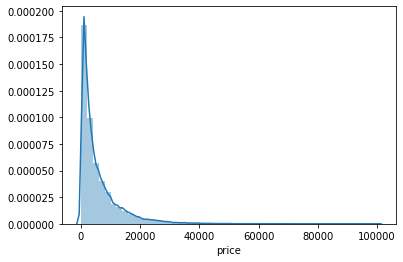

In [6]:
sns.distplot(Train_data['price'])

## 目标变量与数值型变量之间的关系

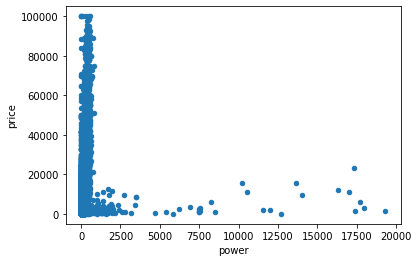

In [7]:
var = 'power'
Train_data.plot.scatter(x=var, y='price')

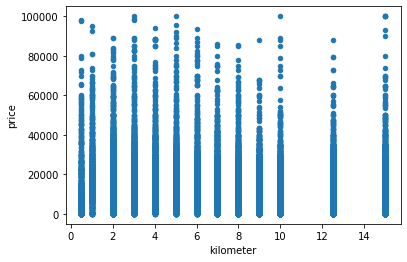

In [8]:
var = 'kilometer'
Train_data.plot.scatter(x=var, y='price')

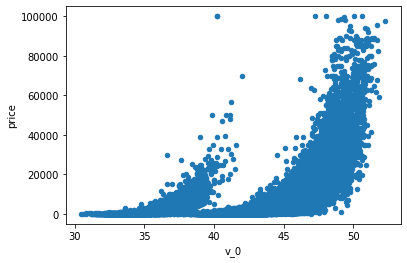

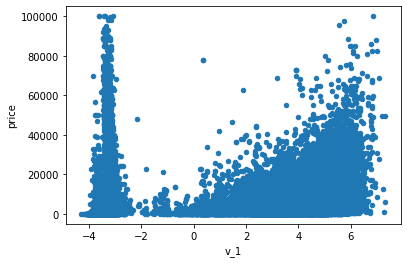

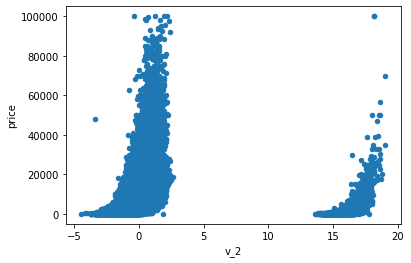

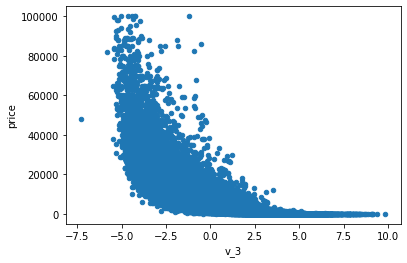

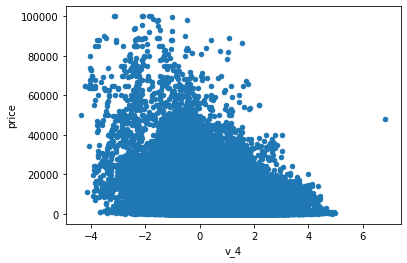

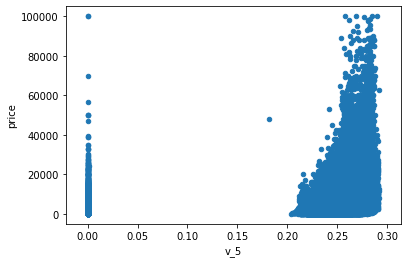

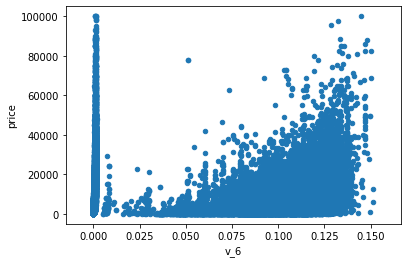

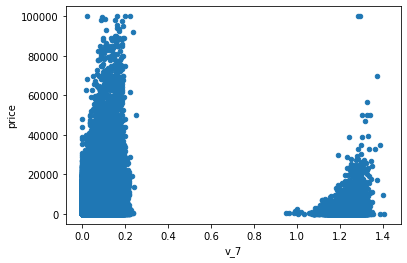

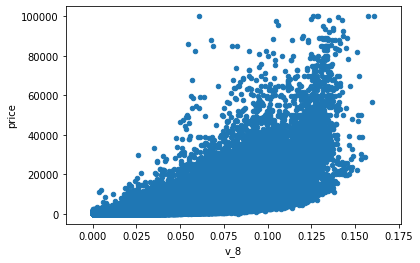

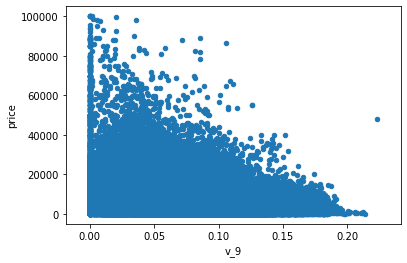

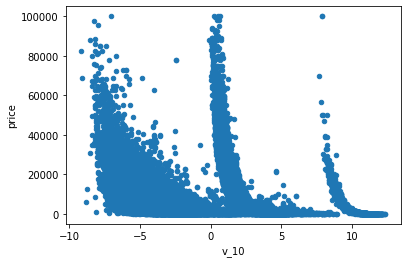

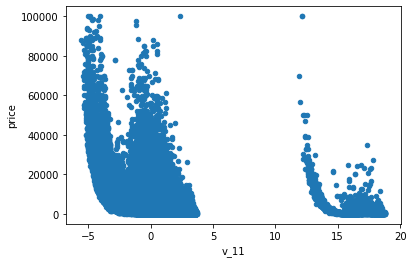

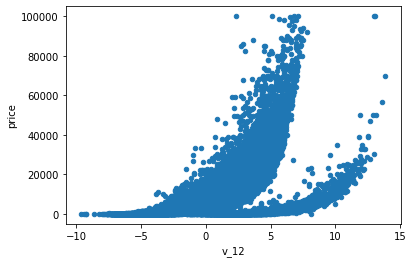

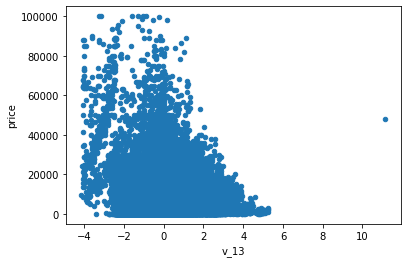

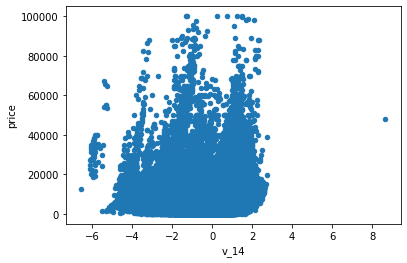

In [9]:
for i in ['v_' + str(i) for i in range(15)]:
    Train_data.plot.scatter(x=i, y='price')

结论：v_13和v_14右侧有异常值

## 目标值与类别型变量之间的关系

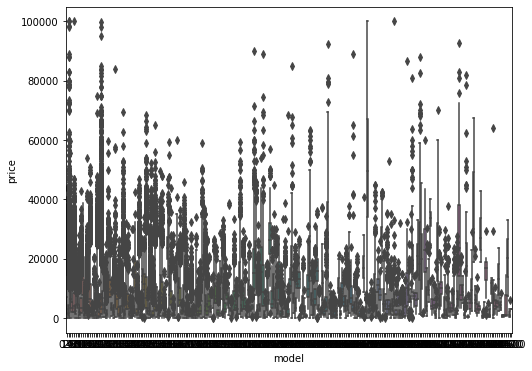

In [10]:
var = 'model'
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=var, y='price', data=Train_data)

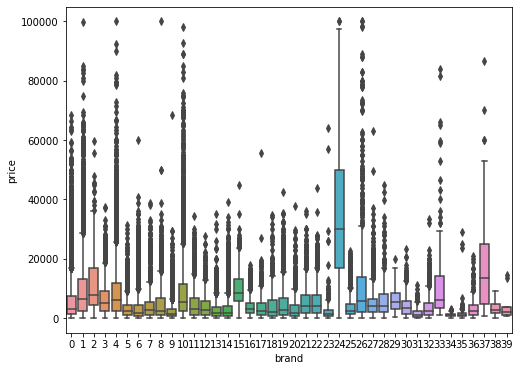

In [11]:
var = 'brand'
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=var, y='price', data=Train_data)

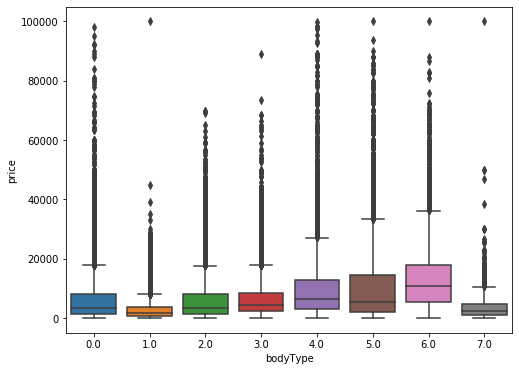

In [12]:
var = 'bodyType'
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=var, y='price', data=Train_data)

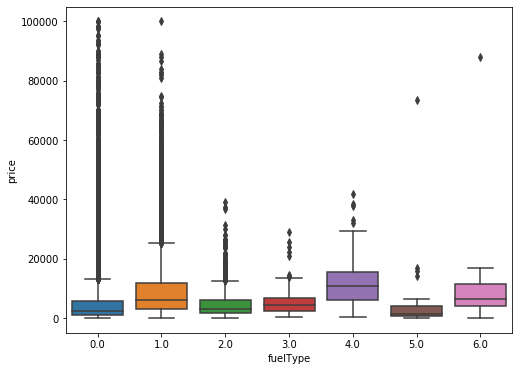

In [13]:
var = 'fuelType'
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=var, y='price', data=Train_data)

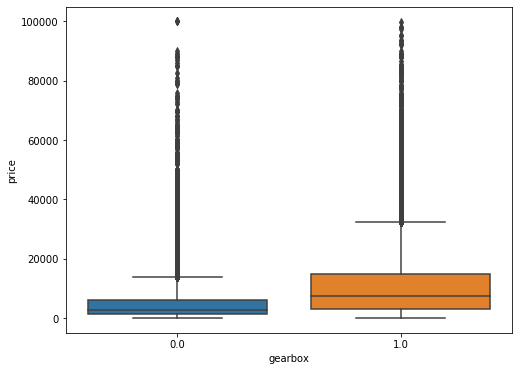

In [14]:
var = 'gearbox'
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=var, y='price', data=Train_data)

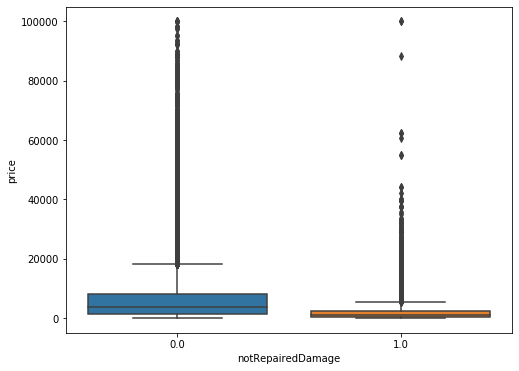

In [15]:
var = 'notRepairedDamage'
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x=var, y='price', data=Train_data)